In [32]:
import pandas as pd
import numpy as np
def rle_decode(rle_mask,size):
    '''
    rle_mask: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = rle_mask.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(size*size, dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(size,size)

def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b > prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths
from PIL import Image
from tqdm import tqdm

In [33]:
df1=pd.read_csv("optimized_100models_weighted_sum_all_sigmoids_1.csv")
df2=pd.read_csv("optimized_100models_weighted_sum_all_sigmoids_2.csv")
df3=pd.read_csv("optimized_100models_weighted_sum_all_sigmoids_3.csv")  
df4=pd.read_csv("optimized_100models_weighted_sum_all_sigmoids_4.csv") 
df = df4.copy()

In [38]:
for i in tqdm(range(len(df1))):
    assert(df4.iloc[i]['id']==df3.iloc[i]['id'])
    assert(df4.iloc[i]['id']==df3.iloc[i]['id'])
    assert(df4.iloc[i]['id']==df2.iloc[i]['id'])
    assert(df4.iloc[i]['id']==df1.iloc[i]['id'])
    assert(df2.iloc[i]['id']==df3.iloc[i]['id'])
    assert(df1.iloc[i]['id']==df3.iloc[i]['id'])
    assert(df1.iloc[i]['id']==df2.iloc[i]['id'])
    imid = df4.iloc[i]['id']
    
    str1=df1.iloc[i]['rle_mask']
    str2=df2.iloc[i]['rle_mask']
    str3=df3.iloc[i]['rle_mask']
    str4=df4.iloc[i]['rle_mask']
    if type(str1) is float: str1=""
    if type(str2) is float: str2=""
    if type(str3) is float: str3=""
    if type(str4) is float: str4=""
    
    im1 = np.transpose(rle_decode(str1,101))
    im2 = np.transpose(rle_decode(str2,101))
    im3 = np.transpose(rle_decode(str3,101))
    im4 = np.transpose(rle_decode(str4,101))
    im = np.zeros(im1.shape)
    for i in range(101):
        for j in range(101):
            b1 = im1[i][j]
            b2 = im2[i][j]
            b3 = im3[i][j]
            b4 = im4[i][j]
            
            if b3==b4: #OCnets agree w. each other
                im[i][j]=b3
            elif b1==b4: #256s agree w. each other
                im[i][j]=b1
            elif b2==b3: #128s agree w. each other while 256s don't
                im[i][j]=b2
            else:
                print("error")  
                assert(False)
    df.loc[df['id'] == imid,'rle_mask']=' '.join(map(str, rle_encoding(im))) 
   # break

  0%|          | 61/18000 [00:01<07:55, 37.76it/s]


KeyboardInterrupt: 

In [36]:
df

,id,rle_mask
0,155410d6fa,2324 1 2425 18 2460 3 2489 9 2517 59 2584 7618
1,78b32781d1,6058 3 6158 4 6257 6 6357 7 6457 8 6557 9 6657...
2,63db2a476a,7470 5 7566 10 7664 13 7762 16 7859 20 7956 24...
3,17bfcdb967,1 10201
4,7ea0fd3c88,1 20 102 19 203 16 304 14 405 12 506 10 607 8 ...
5,8a14fa3b33,293 11 388 17 483 23 578 29 674 34 768 41 861 ...
6,1b4836f485,1 96 102 96 203 95 304 94 405 94 506 93 607 92...
7,04013dfaae,
8,5a005e1b95,8081 3 8182 8 8283 12 8384 18 8485 24 8586 29 ...
9,fe53259bf6,84 18 185 18 285 19 385 20 485 21 586 21 686 2...


In [37]:
df.to_csv("100_stable_models_majvote.csv",index=False)

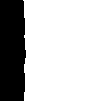

In [25]:
Image.fromarray((im*255).astype('uint8'))

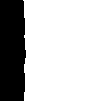

In [29]:
Image.fromarray((im4*255).astype('uint8'))

In [ ]:
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b > prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

all_masks = []
for p_mask in list(binary_prediction):
    p_mask = rle_encoding(p_mask)
    all_masks.append(' '.join(map(str, p_mask)))



submit = pd.DataFrame([test_file_list, all_masks]).T
submit.columns = ['id', 'rle_mask']
submit.to_csv('./100_stable_models_majvote.csv', index = False)